# Angular Inflation with Anguelova

In [1]:
import sympy
import numpy as np
from einsteinpy.symbolic import MetricTensor
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

#import inflatox
import inflatox

In [2]:
sympy.init_printing()
#setup the coordinates
p, x = sympy.symbols("phi chi")
coords = [p, x]
d = len(coords)

#setup the potential
mp, mx, a = sympy.symbols("m_phi m_chi alpha")
V = a/2 * ( (mp*p)**2 + (mx*x)**2 ).nsimplify()

#setup the metric
metric_diagonal = 6*a / (1 - p**2 - x**2)**2
metric = [[0 for i in range(2)] for i in range(2)]
metric[0][0] = metric_diagonal
metric[1][1] = metric_diagonal
metric = MetricTensor(metric, coords)

#display the metric and potential
display(metric.tensor())
display(V)

⎡      6⋅α                         ⎤
⎢────────────────         0        ⎥
⎢               2                  ⎥
⎢⎛   2    2    ⎞                   ⎥
⎢⎝- χ  - φ  + 1⎠                   ⎥
⎢                                  ⎥
⎢                        6⋅α       ⎥
⎢       0          ────────────────⎥
⎢                                 2⎥
⎢                  ⎛   2    2    ⎞ ⎥
⎣                  ⎝- χ  - φ  + 1⎠ ⎦

In [3]:
hesse = inflatox.SymbolicCalculation.new(
  coords,
  metric,
  V,
  assertions=False,
  simplification_depth=0
).execute([[0,1]])

Calculating orthonormal basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculating covariant Hesse matrix...


<IPython.core.display.Math object>

Projecting the Hesse matrix on the vielbein basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
out = inflatox.Compiler(hesse, cleanup=False).compile()
out.print_sym_lookup_table()

[Symbol Dictionary]
phi -> x[0]
chi -> x[1]
alpha -> args[0]
m_chi -> args[1]
m_phi -> args[2]


In [5]:
from inflatox.consistency_conditions import AnguelovaLazaroiuCondition
anguelova = AnguelovaLazaroiuCondition(out)

a = 1/600
m_phi = 2e-5
m_chi = m_phi * np.sqrt(9)

args = np.array([a, m_chi, m_phi])
x = np.array([10.0, 10.0])

V, H = anguelova.calc_V(x, args), anguelova.calc_H(x, args)
print(H, V)
print(3*V*H[0][0]**2)
print(H[0][1]**2*H[1][1])

[[ 5.00363659e-05 -1.89085593e-05]
 [-1.89085593e-05 -2.36356992e-05]] 3.333333333333334e-10
2.5036379078411674e-18
-8.450557013017193e-15


In [6]:
extent = (-1.0, 1.0, -1.0, 1.0)
array = anguelova.evaluate(args, *extent)

In [7]:
print(np.nanmin(array))
print(np.nanmax(array))
print(len(np.where(abs(array) <= 1.0)))

-2.306728317755165e+60
inf
2


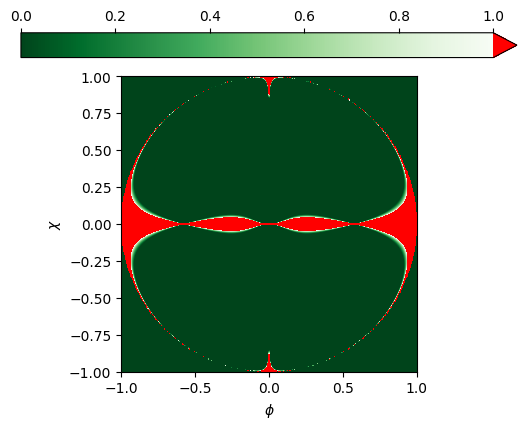

In [8]:
import matplotlib as mpl

cmap = mpl.colormaps['Greens'].copy().reversed()
cmap.set_over('red')
cmap.set_bad('red')

plt.imshow(
  array,
  extent=extent,
  cmap=cmap,
  norm=plt.Normalize(vmin=0.0, vmax=1.0),
  aspect='equal'
)
plt.colorbar(extend='max', location='top')

plt.xlabel(f'${sympy.latex(coords[0])}$')
plt.ylabel(f'${sympy.latex(coords[1])}$')
plt.show()

In [ ]:
two_norm = mpl.colors.TwoSlopeNorm(0.1, vmin=0, vmax=10)
cmap = mpl.colormaps['RdBu'].copy()
cmap.set_over(cmap(1.0))

plt.imshow(
  array,
  extent=extent,
  cmap=cmap,
  norm=two_norm,
  aspect='equal'
)
plt.colorbar(extend='max', location='top')

plt.xlabel(f'${sympy.latex(coords[0])}$')
plt.ylabel(f'${sympy.latex(coords[1])}$')
plt.show()